Project :- Agriculture in India

Student Name: Ponkiya Harshilkumar J.
IIRS Registration No.: TS90705
Registration No.- 202319002
Module: Programming for Geo-data Processing.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this project, i'm using dataset of "ECONOMIC SURVEY 2022-23 STATISTICAL APPENDIX" from https://www.indiabudget.gov.in/economicsurvey/doc/Statistical-Appendix-in-English.pdf.


The aim of this project is to do the analysis and extract some information about the agriculture in india.

In [52]:
# In first step downloaded the required dataset and done data pre-processing in Excel.
# After pre-processing we are loading the dataset with the help of Pandas Library as below.

prod = pd.read_excel("Crops_Production.xlsx")
area = pd.read_excel("Crops_Area.xlsx")
ls = pd.read_excel("Major_Livestock.xlsx")
ic = pd.read_excel('Important_Crops.xlsx')

In [53]:
# In next step we are showing first few samples of prod.

prod.head()

,Years,Foodgrains,Cereals,Rice,Wheat,Coarse Cereals,Maize,Pulses,Tur,Gram,...,Cotton,Jute,Mesta,Tea,Coffee,Rubber^,Sugarcane,Tobacco,Potato,All Commodities
0,2012-13,119.4,117.3,112.0,125.4,109.2,136.9,129.4,111.6,149.9,...,153.2,101.7,62.8,101.0,110.0,110.4,103.9,139.8,182.5,124.2
1,2013-14,123.3,120.7,113.5,128.5,118.0,149.3,135.6,117.2,161.6,...,160.7,109.0,64.6,124.4,110.9,93.6,107.3,156.4,167.2,129.8
2,2014-15,115.9,114.6,112.3,116.0,116.7,148.7,122.0,103.6,124.4,...,155.8,104.4,54.1,123.2,119.1,78.0,110.4,182.0,193.2,124.0
3,2015-16,115.7,115.5,111.1,123.7,104.6,138.8,116.7,94.5,119.7,...,134.3,97.8,62.1,126.9,126.7,68.0,106.1,170.8,174.7,120.8
4,2016-17,131.1,123.7,116.8,132.1,118.8,159.3,165.5,179.9,159.1,...,145.8,102.6,56.5,128.7,113.6,83.6,93.2,171.4,195.6,132.8


In [54]:
# Here, we try to see information about our prod,is there any missing or null values present.

prod.info()
prod.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Years            10 non-null     object 
 1   Foodgrains       10 non-null     float64
 2   Cereals          10 non-null     float64
 3   Rice             10 non-null     float64
 4   Wheat            10 non-null     float64
 5   Coarse Cereals   10 non-null     float64
 6   Maize            10 non-null     float64
 7   Pulses           10 non-null     float64
 8   Tur              10 non-null     float64
 9   Gram             10 non-null     float64
 10  Non-foodgrains   10 non-null     float64
 11  Oilseeds Total   10 non-null     float64
 12  Groundnut        10 non-null     float64
 13  Rapeseed and     10 non-null     float64
 14  Cotton           10 non-null     float64
 15  Jute             10 non-null     float64
 16  Mesta            10 non-null     float64
 17  Tea              10

Years              0
Foodgrains         0
Cereals            0
Rice               0
Wheat              0
Coarse Cereals     0
Maize              0
Pulses             0
Tur                0
Gram               0
Non-foodgrains     0
Oilseeds Total     0
Groundnut          0
Rapeseed and       0
Cotton             0
Jute               0
Mesta              0
Tea                0
Coffee             0
Rubber^            0
Sugarcane          0
Tobacco            1
Potato             0
All Commodities    0
dtype: int64

In [55]:
# As above results showing in last column, one null available.
# For finding the place of null value, now we try to identify near by data values.

prod.tail()

,Years,Foodgrains,Cereals,Rice,Wheat,Coarse Cereals,Maize,Pulses,Tur,Gram,...,Cotton,Jute,Mesta,Tea,Coffee,Rubber^,Sugarcane,Tobacco,Potato,All Commodities
5,2017-18,136.8,127.2,120.0,133.9,127.3,176.9,181.7,158.3,193.1,...,146.9,94.3,47.1,136.4,115.0,83.9,115.7,202.4,206.5,139.4
6,2018-19,134.4,129.2,124.0,138.9,116.4,170.5,158.9,122.4,168.6,...,125.5,93.4,34.4,139.0,116.3,78.7,123.5,140.0,202.0,138.1
7,2019-20,139.8,134.8,126.5,144.6,129.5,177.0,163.3,143.6,188.0,...,161.4,92.9,45.9,140.1,108.5,86.1,112.9,170.5,195.4,145.5
8,2020-21,147.0,139.7,132.4,146.9,139.6,194.7,181.1,159.3,202.1,...,157.8,88.0,42.8,132.1,121.6,86.5,123.5,160.7,226.0,154.1
9,2021-22,150.4,140.4,138.7,143.3,137.3,206.8,197.2,160.1,233.3,...,139.7,97.4,43.5,138.4,124.5,93.7,131.5,NaN,215.6,155.2


In [56]:
# As seen in above feature Tobacco Production for 2021-22 is not available.
# So now, we are assuming that the production for that year is also near about previous year production.
# So we can replace "NaN" with "160.7".

prod.fillna(160.7)

,Years,Foodgrains,Cereals,Rice,Wheat,Coarse Cereals,Maize,Pulses,Tur,Gram,...,Cotton,Jute,Mesta,Tea,Coffee,Rubber^,Sugarcane,Tobacco,Potato,All Commodities
0,2012-13,119.4,117.3,112.0,125.4,109.2,136.9,129.4,111.6,149.9,...,153.2,101.7,62.8,101.0,110.0,110.4,103.9,139.8,182.5,124.2
1,2013-14,123.3,120.7,113.5,128.5,118.0,149.3,135.6,117.2,161.6,...,160.7,109.0,64.6,124.4,110.9,93.6,107.3,156.4,167.2,129.8
2,2014-15,115.9,114.6,112.3,116.0,116.7,148.7,122.0,103.6,124.4,...,155.8,104.4,54.1,123.2,119.1,78.0,110.4,182.0,193.2,124.0
3,2015-16,115.7,115.5,111.1,123.7,104.6,138.8,116.7,94.5,119.7,...,134.3,97.8,62.1,126.9,126.7,68.0,106.1,170.8,174.7,120.8
4,2016-17,131.1,123.7,116.8,132.1,118.8,159.3,165.5,179.9,159.1,...,145.8,102.6,56.5,128.7,113.6,83.6,93.2,171.4,195.6,132.8
5,2017-18,136.8,127.2,120.0,133.9,127.3,176.9,181.7,158.3,193.1,...,146.9,94.3,47.1,136.4,115.0,83.9,115.7,202.4,206.5,139.4
6,2018-19,134.4,129.2,124.0,138.9,116.4,170.5,158.9,122.4,168.6,...,125.5,93.4,34.4,139.0,116.3,78.7,123.5,140.0,202.0,138.1
7,2019-20,139.8,134.8,126.5,144.6,129.5,177.0,163.3,143.6,188.0,...,161.4,92.9,45.9,140.1,108.5,86.1,112.9,170.5,195.4,145.5
8,2020-21,147.0,139.7,132.4,146.9,139.6,194.7,181.1,159.3,202.1,...,157.8,88.0,42.8,132.1,121.6,86.5,123.5,160.7,226.0,154.1
9,2021-22,150.4,140.4,138.7,143.3,137.3,206.8,197.2,160.1,233.3,...,139.7,97.4,43.5,138.4,124.5,93.7,131.5,160.7,215.6,155.2


In [57]:
# Here, we are checking some statatistics about prod.
prod.describe()

,Foodgrains,Cereals,Rice,Wheat,Coarse Cereals,Maize,Pulses,Tur,Gram,Non-foodgrains,...,Cotton,Jute,Mesta,Tea,Coffee,Rubber^,Sugarcane,Tobacco,Potato,All Commodities
count,10.000000,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.00000
mean,131.380000,126.310000,120.7300,133.330000,121.740000,165.890000,155.140000,135.050000,169.980000,141.520000,...,148.110000,98.150000,51.380000,129.020000,116.620000,86.250000,112.800000,166.000000,195.870000,136.39000
std,12.514507,9.617628,9.4948,10.125331,11.449425,23.470996,27.802286,28.872719,35.118365,12.413237,...,11.988555,6.305597,10.143942,11.639187,6.226966,11.370063,11.211898,19.799306,17.962866,12.31038
min,115.700000,114.600000,111.1000,116.000000,104.600000,136.900000,116.700000,94.500000,119.700000,126.100000,...,125.500000,88.000000,34.400000,101.000000,108.500000,68.000000,93.200000,139.800000,167.200000,120.80000
25%,120.375000,118.150000,112.6000,126.175000,116.475000,148.850000,130.950000,113.000000,152.200000,132.825000,...,141.225000,93.625000,44.100000,125.025000,111.575000,79.925000,106.400000,156.400000,185.175000,125.60000
50%,132.750000,125.450000,118.4000,133.000000,118.400000,164.900000,161.100000,133.000000,165.100000,139.200000,...,150.050000,97.600000,50.600000,130.400000,115.650000,85.000000,111.650000,170.500000,195.500000,135.45000
75%,139.050000,133.400000,125.8750,142.200000,128.950000,176.975000,177.200000,159.050000,191.825000,149.000000,...,157.300000,102.375000,60.700000,137.900000,120.975000,91.825000,121.550000,171.400000,205.375000,143.97500
max,150.400000,140.400000,138.7000,146.900000,139.600000,206.800000,197.200000,179.900000,233.300000,161.300000,...,161.400000,109.000000,64.600000,140.100000,126.700000,110.400000,131.500000,202.400000,226.000000,155.20000


Production data extraction for Plotting purpose.

In [58]:
Years = prod['Years'].tolist()
Foodgrains = prod['Foodgrains'].tolist()
Cereals = prod['Cereals'].tolist()
Rice = prod['Rice'].tolist()
Wheat = prod['Wheat'].tolist()
Pulses = prod['Pulses'].tolist()
Gram = prod['Gram'].tolist()
Groundnut = prod['Groundnut'].tolist()
Cotton = prod['Cotton'].tolist()
Tea = prod['Tea'].tolist()
Coffee = prod['Coffee'].tolist()
Sugarcane = prod['Sugarcane'].tolist()
Tobacco = prod['Tobacco'].tolist()
Potato = prod['Potato'].tolist()

Charts

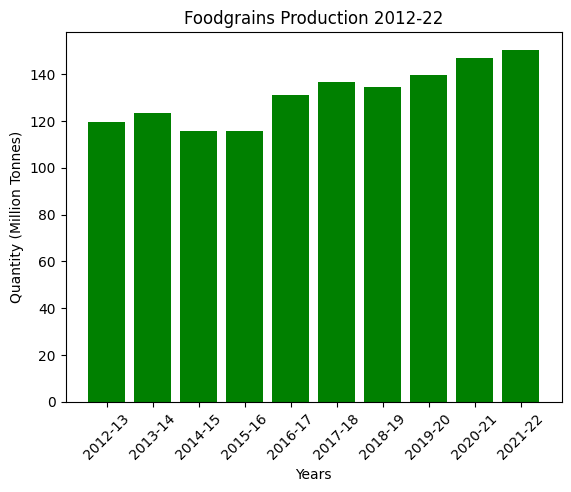

In [59]:
plt.bar(Years, Foodgrains, color='green')
plt.title('Foodgrains Production 2012-22')
plt.xlabel('Years')
plt.ylabel('Quantity (Million Tonnes)')
plt.xticks(rotation=45)

plt.show()

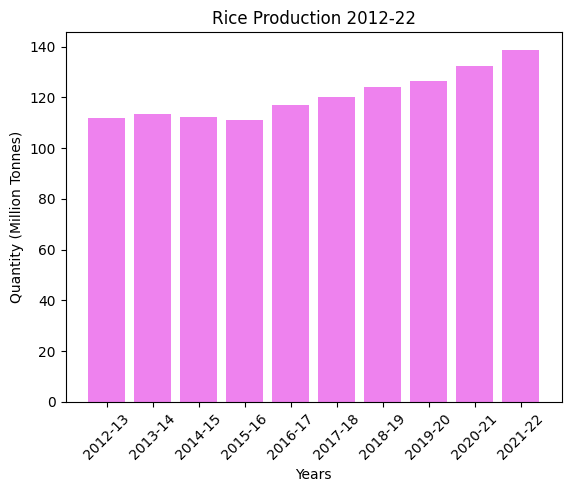

In [60]:
plt.bar(Years, Rice, color='Violet')
plt.title('Rice Production 2012-22')
plt.xlabel('Years')
plt.ylabel('Quantity (Million Tonnes)')
plt.xticks(rotation=45)

plt.show()

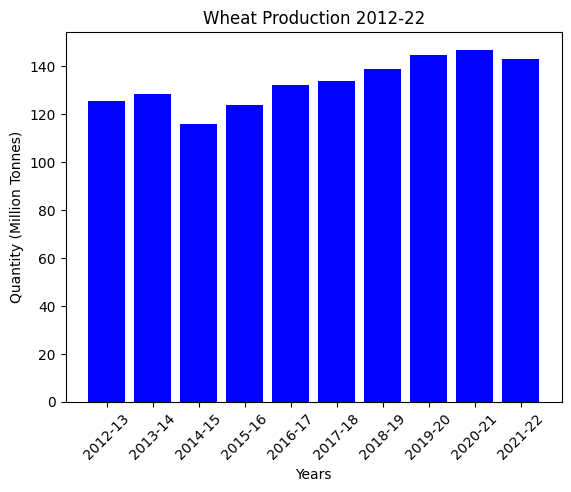

In [61]:
plt.bar(Years, Wheat, color='Blue')
plt.title('Wheat Production 2012-22')
plt.xlabel('Years')
plt.ylabel('Quantity (Million Tonnes)')
plt.xticks(rotation=45)

plt.show()

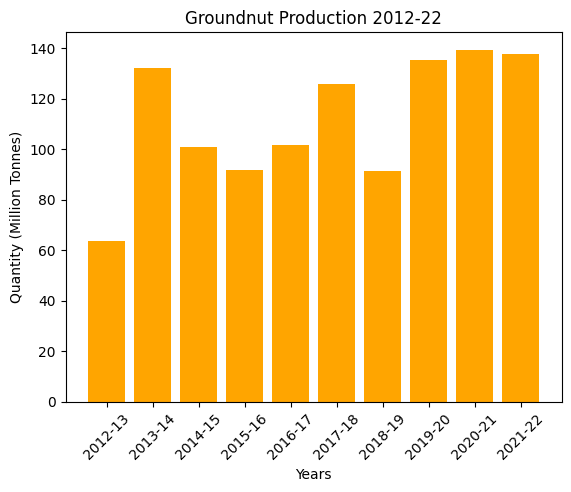

In [62]:
plt.bar(Years, Groundnut, color='Orange')
plt.title('Groundnut Production 2012-22')
plt.xlabel('Years')
plt.ylabel('Quantity (Million Tonnes)')
plt.xticks(rotation=45)

plt.show()

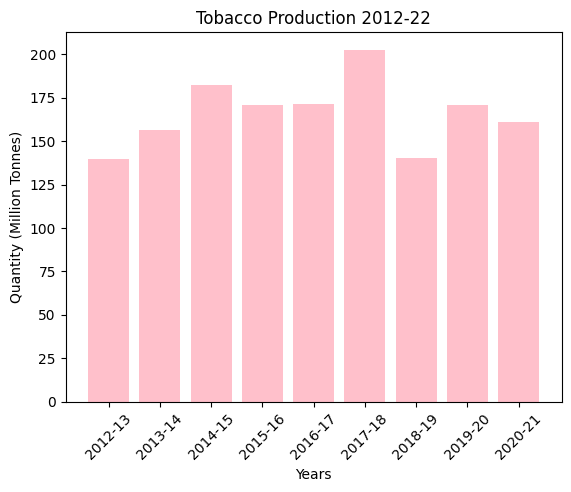

In [63]:
plt.bar(Years, Tobacco, color='Pink')
plt.title('Tobacco Production 2012-22')
plt.xlabel('Years')
plt.ylabel('Quantity (Million Tonnes)')
plt.xticks(rotation=45)

plt.show()

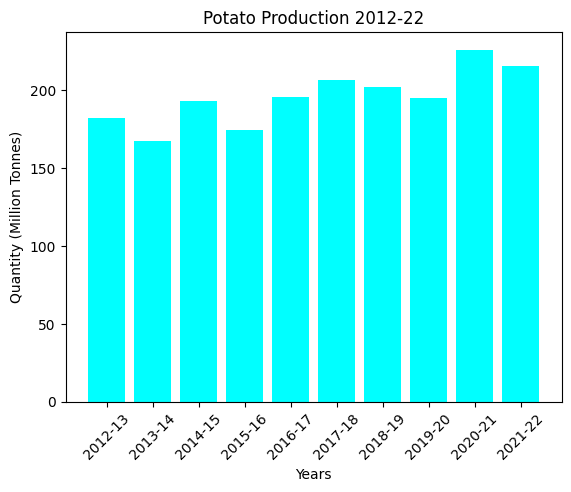

In [64]:
plt.bar(Years, Potato, color='Cyan')
plt.title('Potato Production 2012-22')
plt.xlabel('Years')
plt.ylabel('Quantity (Million Tonnes)')
plt.xticks(rotation=45)

plt.show()

In this above plots, we can analyse that there is increasing trend in agriculture production.

s



In [65]:
area.head()

area.info()
area.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Years            10 non-null     object 
 1   Foodgrains       10 non-null     float64
 2   Cereals          10 non-null     float64
 3   Rice             10 non-null     float64
 4   Wheat            10 non-null     float64
 5   Coarse Cereals   10 non-null     float64
 6   Maize            10 non-null     float64
 7   Pulses           10 non-null     float64
 8   Tur              10 non-null     float64
 9   Gram             10 non-null     float64
 10  Non-foodgrains   10 non-null     float64
 11  Oilseeds Total   10 non-null     float64
 12  Groundnut        10 non-null     float64
 13  Rapeseed and     10 non-null     float64
 14  Cotton           10 non-null     float64
 15  Jute             10 non-null     float64
 16  Mesta            10 non-null     float64
 17  Tea              10

Years              0
Foodgrains         0
Cereals            0
Rice               0
Wheat              0
Coarse Cereals     0
Maize              0
Pulses             0
Tur                0
Gram               0
Non-foodgrains     0
Oilseeds Total     0
Groundnut          0
Rapeseed and       0
Cotton             0
Jute               0
Mesta              0
Tea                0
Coffee             0
Rubber             0
Sugarcane          0
Tobacco            1
Potato             0
All Commodities    0
dtype: int64

In [66]:
temp = area['Tobacco'].tolist()[:-1]
b = np.median(temp)
area.fillna(b)

,Years,Foodgrains,Cereals,Rice,Wheat,Coarse Cereals,Maize,Pulses,Tur,Gram,...,Cotton,Jute,Mesta,Tea,Coffee,Rubber,Sugarcane,Tobacco,Potato,All Commodities
0,2012-13,102.0,101.6,97.6,109.1,92.1,110.2,103.9,107.5,116.4,...,131.9,98.4,60.4,99.9,107.5,123.0,104.1,117.3,134.6,108.9
1,2013-14,105.6,104.0,100.8,110.8,94.4,115.3,112.8,107.8,135.6,...,131.7,95.8,57.4,99.9,111.2,126.3,104.0,125.5,133.3,112.3
2,2014-15,105.4,105.7,100.7,114.4,95.0,116.8,104.2,106.4,112.7,...,141.2,95.0,42.2,99.9,112.6,129.1,105.5,128.7,140.3,111.9
3,2015-16,103.9,102.9,99.3,110.6,91.3,111.9,109.0,109.4,114.7,...,135.4,92.3,38.0,99.9,115.8,131.6,102.6,124.1,143.1,111.6
4,2016-17,109.0,104.5,100.5,111.9,95.3,122.5,129.7,147.3,131.5,...,119.3,89.5,40.4,101.8,119.5,132.8,92.4,110.1,147.3,112.6
5,2017-18,107.4,102.2,100.0,107.8,92.9,119.2,131.8,122.5,144.2,...,138.6,86.9,39.4,105.7,120.4,133.2,98.6,113.1,144.8,112.7
6,2018-19,105.6,100.8,100.8,106.6,85.7,114.8,127.8,125.6,130.4,...,138.9,84.3,27.8,112.2,121.5,133.4,105.4,112.5,146.9,113.5
7,2019-20,107.9,104.6,99.7,114.0,92.3,121.6,123.4,125.1,132.5,...,148.5,79.7,31.6,112.2,121.9,133.5,95.8,111.3,138.6,115.9
8,2020-21,110.0,106.5,104.5,113.2,93.6,125.7,126.7,130.4,136.5,...,146.3,78.8,28.6,112.2,123.3,133.6,101.1,98.4,148.9,119.8
9,2021-22,110.9,105.4,105.9,110.8,89.9,127.6,136.8,139.4,149.0,...,131.2,81.5,29.9,112.2,125.1,134.2,107.2,113.1,148.7,120.2


In [67]:
Years = area['Years'].tolist()
Foodgrains_area = area['Foodgrains'].tolist()
Cereals_area = area['Cereals'].tolist()
Rice_area = area['Rice'].tolist()
Wheat_area = area['Wheat'].tolist()
Pulses_area = area['Pulses'].tolist()
Gram_area = area['Gram'].tolist()
Groundnut_area = area['Groundnut'].tolist()
Cotton_area = area['Cotton'].tolist()
Tea_area = area['Tea'].tolist()
Coffee_area = area['Coffee'].tolist()
Sugarcane_area = area['Sugarcane'].tolist()
Tobacco_area = area['Tobacco'].tolist()
Potato_area = area['Potato'].tolist()

In [68]:
Tea_area

[99.9, 99.9, 99.9, 99.9, 101.8, 105.7, 112.2, 112.2, 112.2, 112.2]

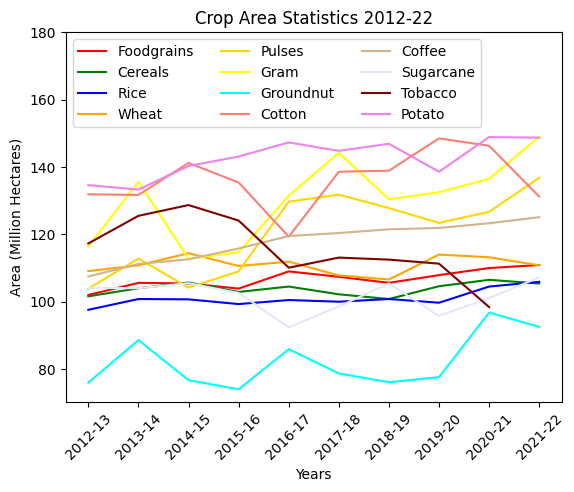

In [69]:
# Here, we are plotting plots for better visulization of data.

# First we can crease lists of our required data.

plt.plot(Years, Foodgrains_area, color='Red', label='Foodgrains')
plt.plot(Years, Cereals_area, color='Green', label='Cereals')
plt.plot(Years, Rice_area, color='Blue', label='Rice')
plt.plot(Years, Wheat_area, color='Orange', label='Wheat')
plt.plot(Years, Pulses_area, color='Gold', label='Pulses')
plt.plot(Years, Gram_area, color='Yellow', label='Gram')
plt.plot(Years, Groundnut_area, color='Cyan', label='Groundnut_')
plt.plot(Years, Cotton_area, color='Salmon', label='Cotton')
plt.plot(Years, Coffee_area, color='Tan', label='Coffee')
plt.plot(Years, Sugarcane_area, color='Lavender', label='Sugarcane')
plt.plot(Years, Tobacco_area, color='Maroon', label='Tobacco')
plt.plot(Years, Potato_area, color='Violet', label='Potato')

# Now

plt.title('Crop Area Statistics 2012-22')
plt.xlabel('Years')
plt.ylabel('Area (Million Hectares)')
plt.xticks(rotation=45)
plt.ylim(top=180)
plt.legend(['Foodgrains', 'Cereals','Rice', 'Wheat', 'Pulses', 'Gram','Groundnut','Cotton','Coffee','Sugarcane','Tobacco','Potato'], loc='upper left', ncols=3)

plt.show()

In [70]:
# Now we are doing analysis regarding Major livestock Products and Fish dataset.

ls.head()

,Year,Milk,Eggs,Fish
0,2012-13,132.4,697.31,90.40
1,2013-14,137.7,747.52,95.79
2,2014-15,146.3,784.84,102.60
3,2015-16,155.5,829.29,107.62
4,2016-17,165.4,881.37,114.31


In [71]:
ls.info()
ls.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    10 non-null     object 
 1   Milk    10 non-null     float64
 2   Eggs    10 non-null     float64
 3   Fish    10 non-null     float64
dtypes: float64(3), object(1)
memory usage: 452.0+ bytes


Year    0
Milk    0
Eggs    0
Fish    0
dtype: int64

In [72]:
Years = ls['Year'].tolist()
Milk = ls['Milk'].tolist()
Eggs = ls['Eggs'].tolist()
Fish = ls['Fish'].tolist()

Now, We are doing group charts plotting for patterns identification in production of major livestock products and fish.

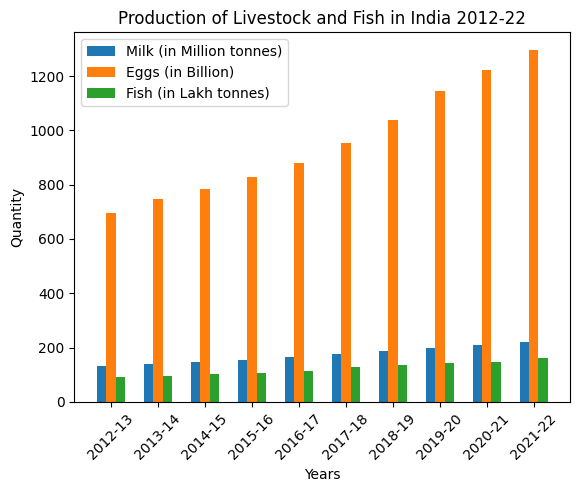

In [73]:
# Group bar chart.
width = 0.2
x = range(len(Years))

plt.bar(x, Milk, width, label='Milk (in Million tonnes)')
plt.bar([i + width for i in x], Eggs, width, label='Eggs (in Billion)')
plt.bar([i + 2 * width for i in x], Fish, width, label='Fish (in Lakh tonnes)')

plt.xlabel('Years')
plt.xticks(rotation=45)
plt.ylabel('Quantity')
plt.title('Production of Livestock and Fish in India 2012-22')
plt.xticks([i + width for i in x], Years)
plt.legend()

plt.show()